<a href="https://colab.research.google.com/github/Pragun-m/TSF-TASK-2-Prediction-using-Unsupervised-ML/blob/main/GRIP_TASK_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAGUN MANTRI**

### **THE SPARK FOUNDATION - GRIP - DATA SCIENCE AND BUISNESS ANALYTICS - AUGUST'21**

### **Task 2 : Prediction using Unsupervised ML**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.style.use('ggplot')


### **Loading the Iris Dataset into the notebook**

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### **To find if any null value is present**

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
# To see summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


### **Creating HeatMap to visualize correlation**

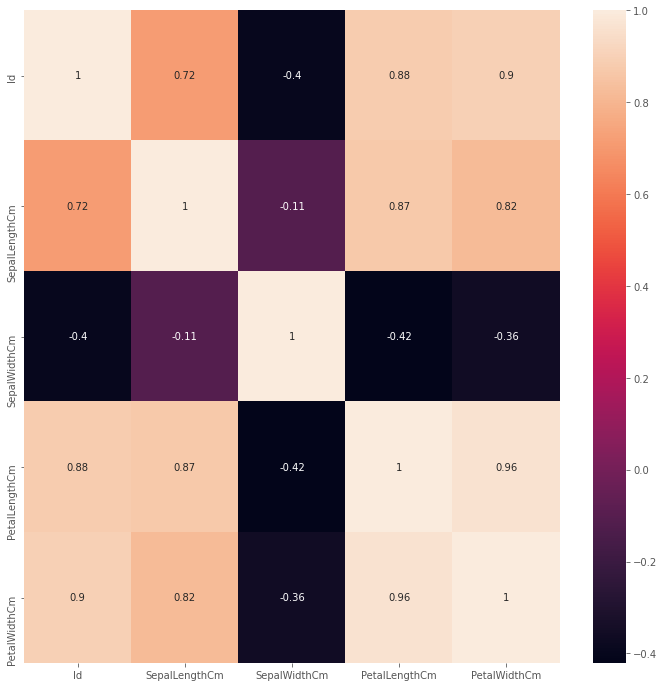

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot= True)

### **Processing**

In [6]:
x=df.drop(columns=['Id','Species'],axis=1)
y=df.Species
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y=encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **Finding outliers**

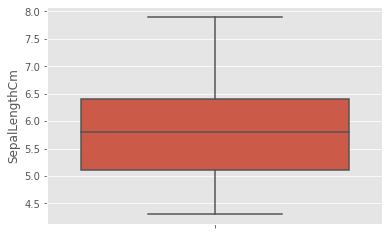

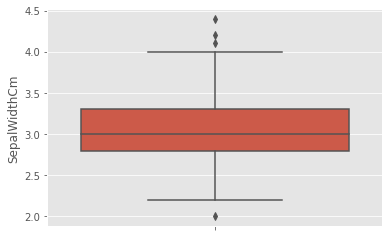

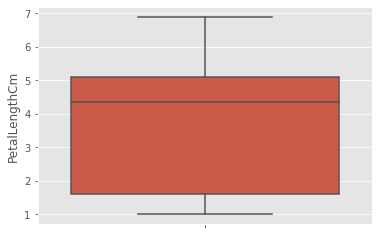

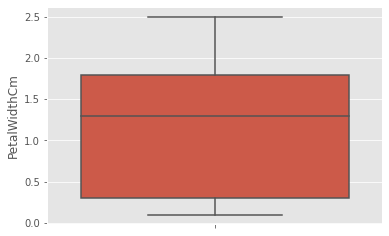

In [7]:
cols = x.columns
for i in cols:
    sns.boxplot(y=x[i])
    plt.show()

From the above boxplot we can say that there are outliers in the column 'SepalWidthCm'

In [8]:
# Removing outliers from 'SepalWidthCm'
q1 = x['SepalWidthCm'].quantile(0.25)
q3 = x['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
x = x[(x['SepalWidthCm'] >= q1-1.5*iqr) & (x['SepalWidthCm'] <= q3+1.5*iqr)]

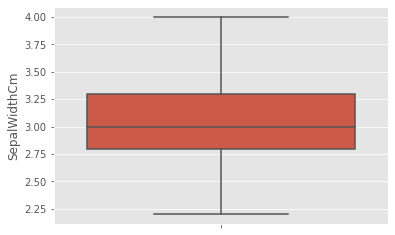

In [9]:
sns.boxplot(y=x['SepalWidthCm'])
plt.show()

### **Finding the optimal number of clusters for K-Means and determining the value of K**

### **Ploting elbow curve or sree to find the no. of cluster**

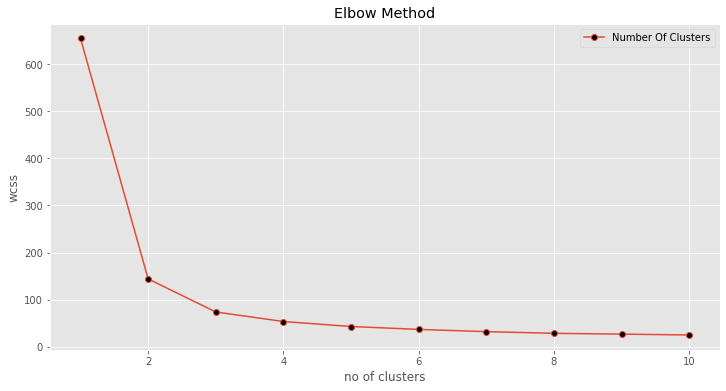

In [10]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
wcss=[]  ## WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
wcss

#Elbow Method- to find value of k
plt.plot(range(1,11),wcss , marker='o' ,  markerfacecolor='black')
plt.title('Elbow Method')
plt.xlabel('no of clusters')
labels = ["Number Of Clusters" , "Wcss"]
plt.ylabel('wcss')  # Within cluster sum of squares   #wcss is low for higher no. of clusters
plt.legend(labels=labels)
plt.show()


"The elbow method" got its name from the elbow pattern forming something like above. The optimal clusters are formed where the elbow occurs. This is when the WCSS(Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.

Here we choose the number of clusters as '3'.

In [11]:
model= KMeans(n_clusters = 3, random_state = 1)
y_pred = model.fit_predict(x)
x=x.values

In [12]:
kmeans.cluster_centers_

array([[6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [4.71304348, 3.12173913, 1.4173913 , 0.19130435],
       [5.615     , 2.64      , 4.005     , 1.225     ],
       [6.03529412, 2.70588235, 5.04117647, 1.79411765],
       [7.72      , 3.2       , 6.66      , 2.12      ],
       [5.96153846, 2.87692308, 4.51538462, 1.44615385],
       [5.22916667, 3.6       , 1.50833333, 0.29583333],
       [5.        , 2.4       , 3.2       , 1.03333333],
       [6.63333333, 3.03333333, 4.63333333, 1.45833333],
       [7.3       , 3.07142857, 6.04285714, 2.        ]])

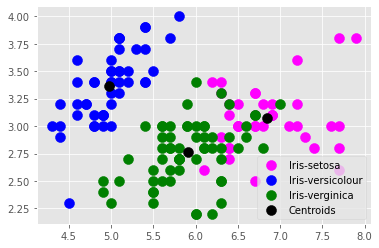

In [13]:
# visualizing the clusters- On the first two columns
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'magenta', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-verginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()